In [10]:
# 1. ИМПОРТ БИБЛИОТЕК
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import os

# Визуализация
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.offline import plot

# Машинное обучение (для кластеризации в RFM)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
from sklearn.preprocessing import FunctionTransformer

In [11]:
# 🚀 ПОЛНЫЙ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ
data = pd.read_csv('merged_sales_data.csv')
df = data

🚀 ПОЛНЫЙ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ

1. 🔄 ПОДГОТОВКА ДАННЫХ
------------------------------
📥 ЗАГРУЗКА ДАННЫХ...
✅ Файл merged_sales_data.csv успешно загружен
📊 Размер данных: (58189, 50)

👀 ПЕРВЫЕ 3 СТРОКИ ИСХОДНЫХ ДАННЫХ:


,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage,Region Info
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,...,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,https://en.wikipedia.org/wiki/Canada
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.995,...,Mountain,Mountain-100,http://www.avising.com/me/LearnPBI/DataSources...,Top-of-the-line competition mountain bike. Per...,2005-07-01,France,France,Europe,http://www.avising.com/me/LearnPBI/DataSources...,https://en.wikipedia.org/wiki/France
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.995,...,Mountain,Mountain-100,http://www.avising.com/me/LearnPBI/DataSources...,Top-of-the-line competition mountain bike. Per...,2005-07-01,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...,https://en.wikipedia.org/wiki/Northwestern_Uni...



🧹 ОЧИСТКА И ПРЕОБРАЗОВАНИЕ ДАННЫХ...
✅ Очистка завершена:
   • Удалено дубликатов: 0
   • Финальный размер: (58189, 59)

2. 📊 ВИЗУАЛИЗАЦИЯ И АНАЛИЗ
------------------------------
🔍 ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ...
📊 СТРУКТУРА ДАННЫХ:
   • Числовые колонки: 25
   • Категориальные колонки: 28
   • Временные колонки: 5

📈 СОЗДАНИЕ ВИЗУАЛИЗАЦИЙ...


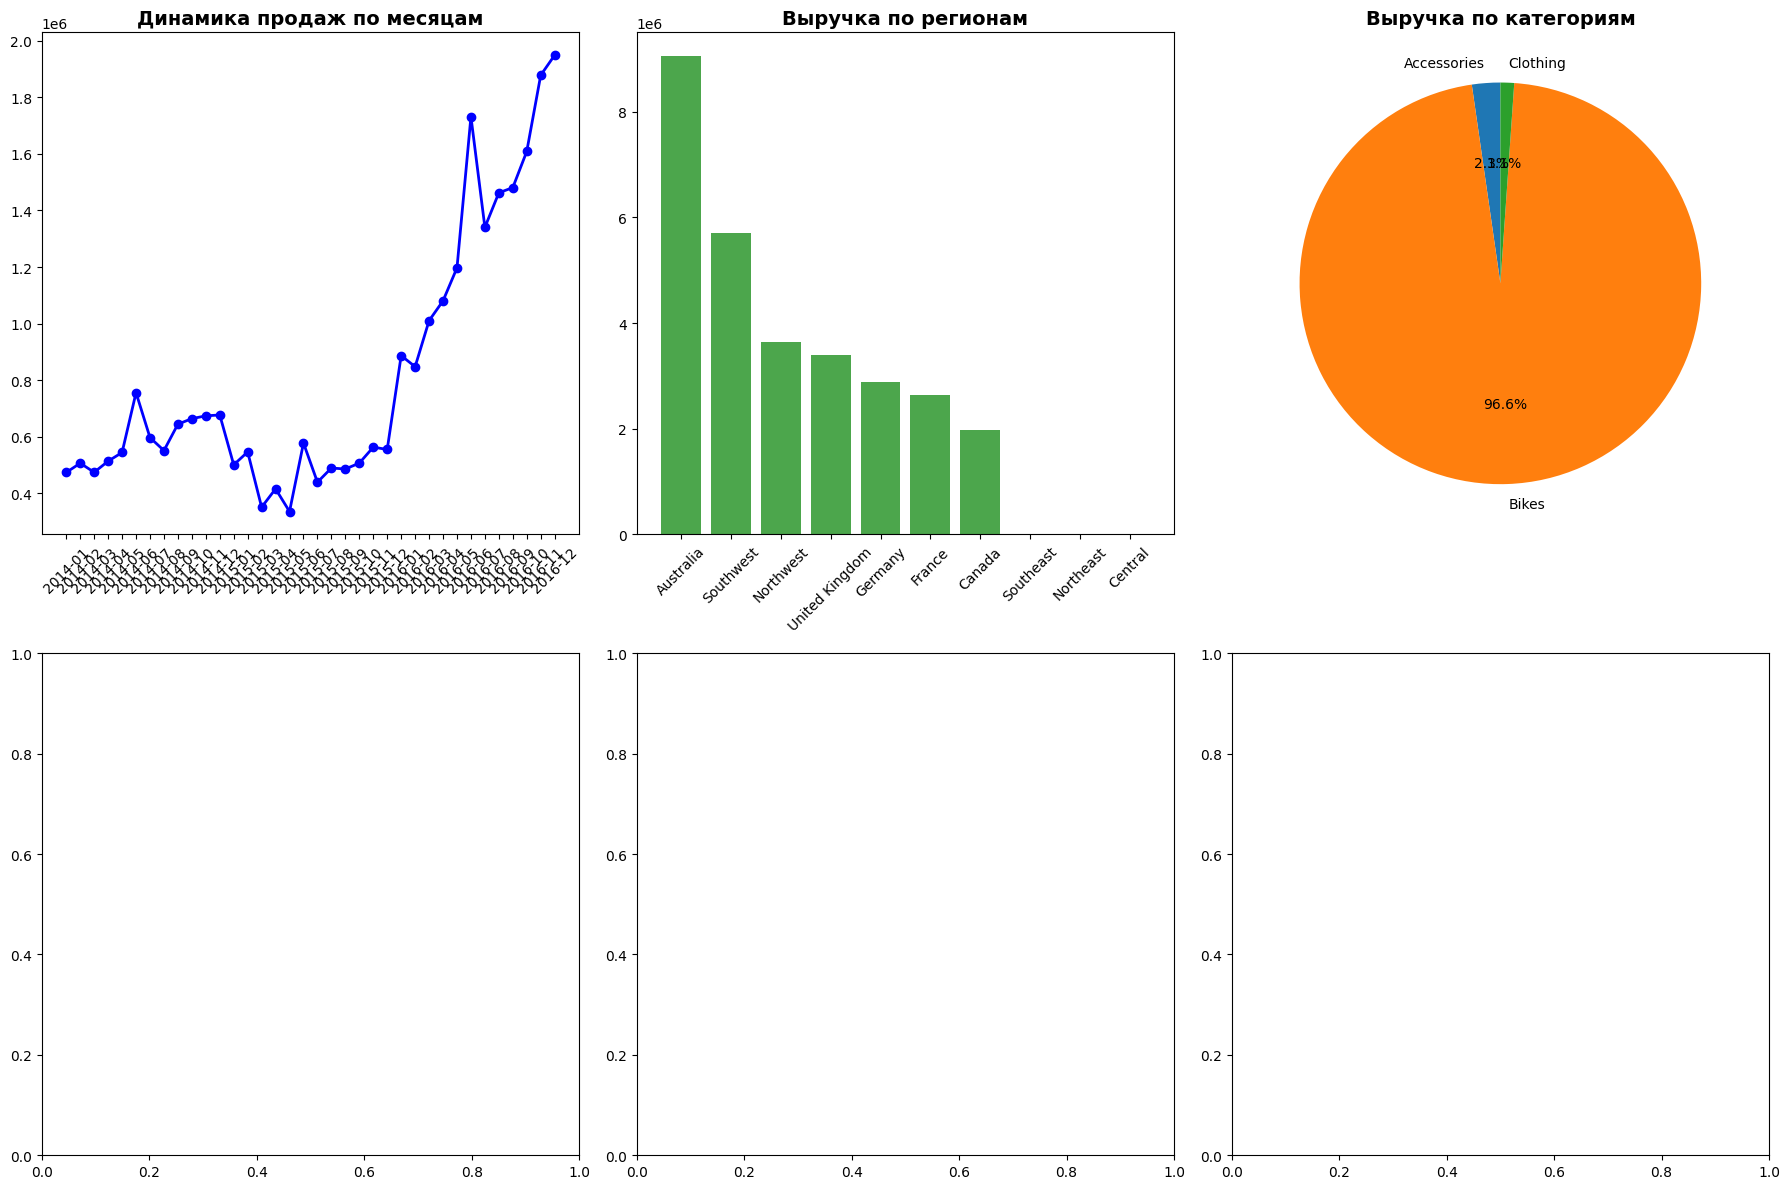

✅ Статические визуализации созданы и сохранены

💡 ИЗВЛЕЧЕНИЕ КЛЮЧЕВЫХ ИНСАЙТОВ...
🎯 ОСНОВНЫЕ ИНСАЙТЫ:
1. 💰 Общая выручка: $29,307,837
2. 👥 Количество клиентов: 17918
3. 📦 Количество продуктов: 158
4. 📊 Средний чек: $1,098

3. 🎯 ОБОГАЩЕНИЕ ДАННЫХ
------------------------------
🎯 RFM-АНАЛИЗ КЛИЕНТОВ...
✅ RFM-анализ завершен:
   • Champions: 2227 клиентов
   • Hibernating: 1895 клиентов

📦 ABC-XYZ АНАЛИЗ ПРОДУКТОВ...
✅ ABC-XYZ анализ завершен:
   • Продуктов категории A: 45
   • Доля выручки категории A: 79.3%

4. 📝 ЗАКЛЮЧЕНИЕ И ВЫВОДЫ
🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:

1. 📈 ЭФФЕКТИВНОСТЬ ПРОДАЖ:
   • Общая выручка: $29,307,837
   • Средний чек: $1,098

2. 👥 КЛИЕНТСКАЯ БАЗА:
   • 2227 клиентов в сегменте 'Champions' (наиболее ценные)
   • 1895 клиентов в сегменте 'Hibernating' (требуют реактивации)
   • Всего клиентов: 17918

3. 📦 ПРОДУКТОВЫЙ ПОРТФЕЛЬ:
   • Категория A продуктов приносит 79.3% общей выручки
   • Всего продуктов: 158

💡 РЕКОМЕНДАЦИИ:

1. 🎯 ДЛЯ МАРКЕТИНГА:
   • Разработать программу лояль

In [12]:
# 🚀 ПОЛНЫЙ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ
print("🚀 ПОЛНЫЙ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ")
print("=" * 60)

# 1. ПОДГОТОВКА ДАННЫХ
print("\n1. 🔄 ПОДГОТОВКА ДАННЫХ")
print("-" * 30)

# Загрузка объединенного CSV файла
print("📥 ЗАГРУЗКА ДАННЫХ...")
csv_file = 'merged_sales_data.csv'

try:
    df = pd.read_csv(csv_file, encoding='utf-8')
    print(f"✅ Файл {csv_file} успешно загружен")
    print(f"📊 Размер данных: {df.shape}")
except FileNotFoundError:
    print(f"❌ Файл {csv_file} не найден")
    print("📁 Убедитесь, что файл находится в текущей директории")
    df = None

if df is not None:
    print("\n👀 ПЕРВЫЕ 3 СТРОКИ ИСХОДНЫХ ДАННЫХ:")
    display(df.head(3))
    
    # Очистка и преобразование данных
    print("\n🧹 ОЧИСТКА И ПРЕОБРАЗОВАНИЕ ДАННЫХ...")
    
    # Сохраняем исходный размер
    initial_count = len(df)
    initial_columns = len(df.columns)
    
    # Удаление дубликатов
    df = df.drop_duplicates()
    duplicates_removed = initial_count - len(df)
    
    # Преобразование дат
    date_columns = ['OrderDate', 'ShipDate', 'BirthDate', 'DateFirstPurchase', 'StartDate']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Создание новых признаков
    if 'OrderDate' in df.columns:
        df['OrderYear'] = df['OrderDate'].dt.year
        df['OrderMonth'] = df['OrderDate'].dt.month
        df['OrderQuarter'] = df['OrderDate'].dt.quarter
        df['OrderDayOfWeek'] = df['OrderDate'].dt.day_name()
        
        if 'ShipDate' in df.columns:
            df['DeliveryDays'] = (df['ShipDate'] - df['OrderDate']).dt.days
    
    if 'YearlyIncome' in df.columns:
        df['IncomeSegment'] = pd.cut(df['YearlyIncome'], 
                                   bins=[0, 50000, 80000, 100000, float('inf')],
                                   labels=['Low', 'Medium', 'High', 'Very High'])
    
    if 'BirthDate' in df.columns:
        df['Age'] = (datetime.now() - df['BirthDate']).dt.days // 365
    
    if 'SalesAmount' in df.columns and 'TotalProductCost' in df.columns:
        df['Profit'] = df['SalesAmount'] - df['TotalProductCost']
        df['ProfitMargin'] = (df['Profit'] / df['SalesAmount']) * 100
    
    print(f"✅ Очистка завершена:")
    print(f"   • Удалено дубликатов: {duplicates_removed}")
    print(f"   • Финальный размер: {df.shape}")

# 2. ВИЗУАЛИЗАЦИЯ И АНАЛИЗ
print("\n2. 📊 ВИЗУАЛИЗАЦИЯ И АНАЛИЗ")
print("-" * 30)

if df is not None:
    # Исследовательский анализ
    print("🔍 ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ...")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print(f"📊 СТРУКТУРА ДАННЫХ:")
    print(f"   • Числовые колонки: {len(numeric_cols)}")
    print(f"   • Категориальные колонки: {len(categorical_cols)}")
    print(f"   • Временные колонки: {len(df.select_dtypes(include=['datetime64']).columns)}")
    
    # Визуализации
    print("\n📈 СОЗДАНИЕ ВИЗУАЛИЗАЦИЙ...")
    
    # Создаем subplots для EDA
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Динамика продаж
    if 'OrderDate' in df.columns and 'SalesAmount' in df.columns:
        monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['SalesAmount'].sum()
        axes[0,0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linewidth=2, color='blue')
        axes[0,0].set_title('Динамика продаж по месяцам', fontsize=14, fontweight='bold')
        axes[0,0].tick_params(axis='x', rotation=45)
    
    # Регионы
    if 'Region' in df.columns:
        region_sales = df.groupby('Region')['SalesAmount'].sum().sort_values(ascending=False)
        axes[0,1].bar(range(len(region_sales)), region_sales.values, color='green', alpha=0.7)
        axes[0,1].set_title('Выручка по регионам', fontsize=14, fontweight='bold')
        axes[0,1].set_xticks(range(len(region_sales)))
        axes[0,1].set_xticklabels(region_sales.index, rotation=45)
    
    # Категории продуктов
    if 'Category' in df.columns:
        category_sales = df.groupby('Category')['SalesAmount'].sum()
        axes[0,2].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
        axes[0,2].set_title('Выручка по категориям', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Статические визуализации созданы и сохранены")
    
    # Извлечение инсайтов
    print("\n💡 ИЗВЛЕЧЕНИЕ КЛЮЧЕВЫХ ИНСАЙТОВ...")
    
    total_revenue = df['SalesAmount'].sum()
    total_customers = df['CustomerKey'].nunique()
    total_products = df['ProductKey'].nunique()
    avg_order_value = df.groupby('SalesOrderNumber')['SalesAmount'].sum().mean()
    
    print("🎯 ОСНОВНЫЕ ИНСАЙТЫ:")
    print(f"1. 💰 Общая выручка: ${total_revenue:,.0f}")
    print(f"2. 👥 Количество клиентов: {total_customers}")
    print(f"3. 📦 Количество продуктов: {total_products}")
    print(f"4. 📊 Средний чек: ${avg_order_value:,.0f}")

# 3. ОБОГАЩЕНИЕ ДАННЫХ
print("\n3. 🎯 ОБОГАЩЕНИЕ ДАННЫХ")
print("-" * 30)

if df is not None:
    # RFM-анализ
    print("🎯 RFM-АНАЛИЗ КЛИЕНТОВ...")
    
    snapshot_date = df['OrderDate'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('CustomerKey').agg({
        'OrderDate': lambda x: (snapshot_date - x.max()).days,
        'SalesOrderNumber': 'nunique',
        'SalesAmount': 'sum'
    }).reset_index()
    rfm.columns = ['CustomerKey', 'Recency', 'Frequency', 'Monetary']
    
    # Сегментация RFM
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    
    # Назначение сегментов
    segments = []
    for _, row in rfm.iterrows():
        r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
        if r >= 4 and f >= 4 and m >= 4:
            segments.append('Champions')
        elif r >= 3 and f >= 3 and m >= 3:
            segments.append('Loyal Customers')
        elif r >= 4 and f <= 2 and m <= 2:
            segments.append('New Customers')
        elif r >= 3 and f <= 2 and m <= 2:
            segments.append('Promising')
        elif r <= 2 and f >= 3 and m >= 3:
            segments.append('Need Attention')
        elif r <= 2 and f <= 2 and m <= 2:
            segments.append('Hibernating')
        else:
            segments.append('Regular')
    
    rfm['Segment'] = segments
    champions_count = len(rfm[rfm['Segment'] == 'Champions'])
    hibernating_count = len(rfm[rfm['Segment'] == 'Hibernating'])
    
    print(f"✅ RFM-анализ завершен:")
    print(f"   • Champions: {champions_count} клиентов")
    print(f"   • Hibernating: {hibernating_count} клиентов")
    
    # ABC-XYZ анализ
    print("\n📦 ABC-XYZ АНАЛИЗ ПРОДУКТОВ...")
    
    product_sales = df.groupby(['ProductKey', 'ProductName']).agg({
        'SalesAmount': 'sum',
        'OrderQuantity': 'sum',
        'Profit': 'sum'
    }).reset_index().sort_values('SalesAmount', ascending=False)
    
    product_sales['CumulativePercentage'] = (product_sales['SalesAmount'].cumsum() / product_sales['SalesAmount'].sum() * 100)
    
    # ABC категории
    abc_cats = []
    for pct in product_sales['CumulativePercentage']:
        if pct <= 80:
            abc_cats.append('A')
        elif pct <= 95:
            abc_cats.append('B')
        else:
            abc_cats.append('C')
    
    product_sales['ABC_Category'] = abc_cats
    
    # ИСПРАВЛЕННАЯ СТРОКА: Подсчет продуктов категории A
    a_products_count = len(product_sales[product_sales['ABC_Category'] == 'A'])
    a_products_revenue = product_sales[product_sales['ABC_Category'] == 'A']['SalesAmount'].sum()
    a_percentage = (a_products_revenue / product_sales['SalesAmount'].sum()) * 100
    
    print(f"✅ ABC-XYZ анализ завершен:")
    print(f"   • Продуктов категории A: {a_products_count}")
    print(f"   • Доля выручки категории A: {a_percentage:.1f}%")

# 4. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ
print("\n4. 📝 ЗАКЛЮЧЕНИЕ И ВЫВОДЫ")
print("=" * 40)

if df is not None:
    print("🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
    print()
    print("1. 📈 ЭФФЕКТИВНОСТЬ ПРОДАЖ:")
    print(f"   • Общая выручка: ${total_revenue:,.0f}")
    print(f"   • Средний чек: ${avg_order_value:,.0f}")
    print()
    print("2. 👥 КЛИЕНТСКАЯ БАЗА:")
    print(f"   • {champions_count} клиентов в сегменте 'Champions' (наиболее ценные)")
    print(f"   • {hibernating_count} клиентов в сегменте 'Hibernating' (требуют реактивации)")
    print(f"   • Всего клиентов: {total_customers}")
    print()
    print("3. 📦 ПРОДУКТОВЫЙ ПОРТФЕЛЬ:")
    print(f"   • Категория A продуктов приносит {a_percentage:.1f}% общей выручки")
    print(f"   • Всего продуктов: {total_products}")
    print()
    print("💡 РЕКОМЕНДАЦИИ:")
    print()
    print("1. 🎯 ДЛЯ МАРКЕТИНГА:")
    print("   • Разработать программу лояльности для 'Champions'")
    print("   • Провести реактивационную кампанию для 'Hibernating'")
    print("   • Персонализировать коммуникации по RFM-сегментам")
    print()
    print("2. 📦 ДЛЯ ПРОДАЖ:")
    print("   • Сфокусироваться на продвижении продуктов категории A")
    print("   • Оптимизировать запасы по результатам анализа")
    print("   • Разработать кросс-селлинг стратегию")
    print()
    print("3. 📊 ДЛЯ БИЗНЕСА:")
    print("   • Увеличить присутствие в наиболее прибыльных регионах")
    print("   • Мониторить сезонные паттерны для планирования")
    print("   • Внедрить регулярный RFM и ABC-XYZ анализ")
    
    # Сохранение отчета
    print(f"\n💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ...")
    
    report_content = f"""
ОТЧЕТ ПО АНАЛИЗУ ПРОДАЖ
{'=' * 50}

ОСНОВНЫЕ МЕТРИКИ:
• Общая выручка: ${total_revenue:,.0f}
• Количество клиентов: {total_customers}
• Количество продуктов: {total_products}
• Средний чек: ${avg_order_value:,.0f}

КЛЮЧЕВЫЕ ВЫВОДЫ:
• {champions_count} клиентов в сегменте "Champions"
• {hibernating_count} клиентов в сегменте "Hibernating" 
• Категория A продуктов приносит {a_percentage:.1f}% выручки

РЕКОМЕНДАЦИИ:
• Разработать программу лояльности для Champions
• Провести реактивацию Hibernating клиентов
• Сфокусироваться на продуктах категории A
• Оптимизировать запасы и ассортимент
"""
    
    with open('analysis_final_report.txt', 'w', encoding='utf-8') as f:
        f.write(report_content)
    
    # Сохранение очищенных данных
    df.to_csv('cleaned_sales_data.csv', index=False, encoding='utf-8')
    
    print("✅ РЕЗУЛЬТАТЫ СОХРАНЕНЫ:")
    print("   - cleaned_sales_data.csv (очищенные данные)")
    print("   - analysis_final_report.txt (финальный отчет)")
    print("   - eda_analysis.png (визуализации)")
    print("   - RFM и ABC-XYZ датафреймы доступны для анализа")

print("\n" + "=" * 60)
print("✅ ПОЛНЫЙ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ ЗАВЕРШЕН!")
print("=" * 60)